# Ridership analysis across months
Based on ridership_guhan, but with monthly analysis. The goal is to observe for a particular bus route, if ridership has faced increase or decrease across months

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
bus_routes = pd.read_json('../data/cleaned/BusRoutes.json', lines=True)
bus_ridership_quarter = pd.read_csv('../data/cleaned/BusRideVolume_2024_070809.csv', dtype={'PT_CODE': int})

In [14]:
bus_routes.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
0,10,SBST,1,1,75009,0.0,0500,2300,0500,2300,0500,2300
1,10,SBST,1,2,76059,0.6,0502,2302,0502,2302,0502,2302
2,10,SBST,1,3,76069,1.1,0504,2304,0504,2304,0503,2304
3,10,SBST,1,4,96289,2.3,0508,2308,0508,2309,0507,2308
4,10,SBST,1,5,96109,2.7,0509,2310,0509,2311,0508,2309


In [15]:
bus_ridership_quarter.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-07,WEEKDAY,19.0,BUS,46359,279,138
1,2024-07,WEEKDAY,6.0,BUS,64551,570,26
2,2024-07,WEEKDAY,9.0,BUS,92099,2009,866
3,2024-07,WEEKDAY,6.0,BUS,12201,51,1405
4,2024-07,WEEKDAY,17.0,BUS,77101,94,110


### Understanding the ridership data in general

In [16]:
average_ridership_by_stop = bus_ridership_quarter.groupby(['YEAR_MONTH', 'TIME_PER_HOUR', 'DAY_TYPE']).agg({
    'TOTAL_TAP_IN_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    'TOTAL_TAP_OUT_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
}).reset_index()
average_ridership_by_stop.columns = ['YEAR_MONTH', 'TIME_PER_HOUR', 'DAY_TYPE', 'TAP_IN_MEAN', 'TAP_IN_25', 'TAP_IN_75', 'TAP_OUT_MEAN', 'TAP_OUT_25', 'TAP_OUT_75']

In [6]:
average_ridership_by_stop.head()

,YEAR_MONTH,TIME_PER_HOUR,DAY_TYPE,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
0,2024-07,0.0,WEEKDAY,67.845101,3.0,37.0,98.928194,11.0,117.0
1,2024-07,0.0,WEEKENDS/HOLIDAY,32.158609,1.0,17.0,46.623582,6.0,56.0
2,2024-07,1.0,WEEKDAY,7.769004,0.0,5.0,17.827342,3.0,19.0
3,2024-07,1.0,WEEKENDS/HOLIDAY,3.555768,0.0,2.0,8.835564,2.0,10.0
4,2024-07,2.0,WEEKDAY,2.380952,0.0,2.0,5.428571,1.0,5.0


Plot ridership data by time of hour for tap in/tap out volume and whether or not it is a weekday

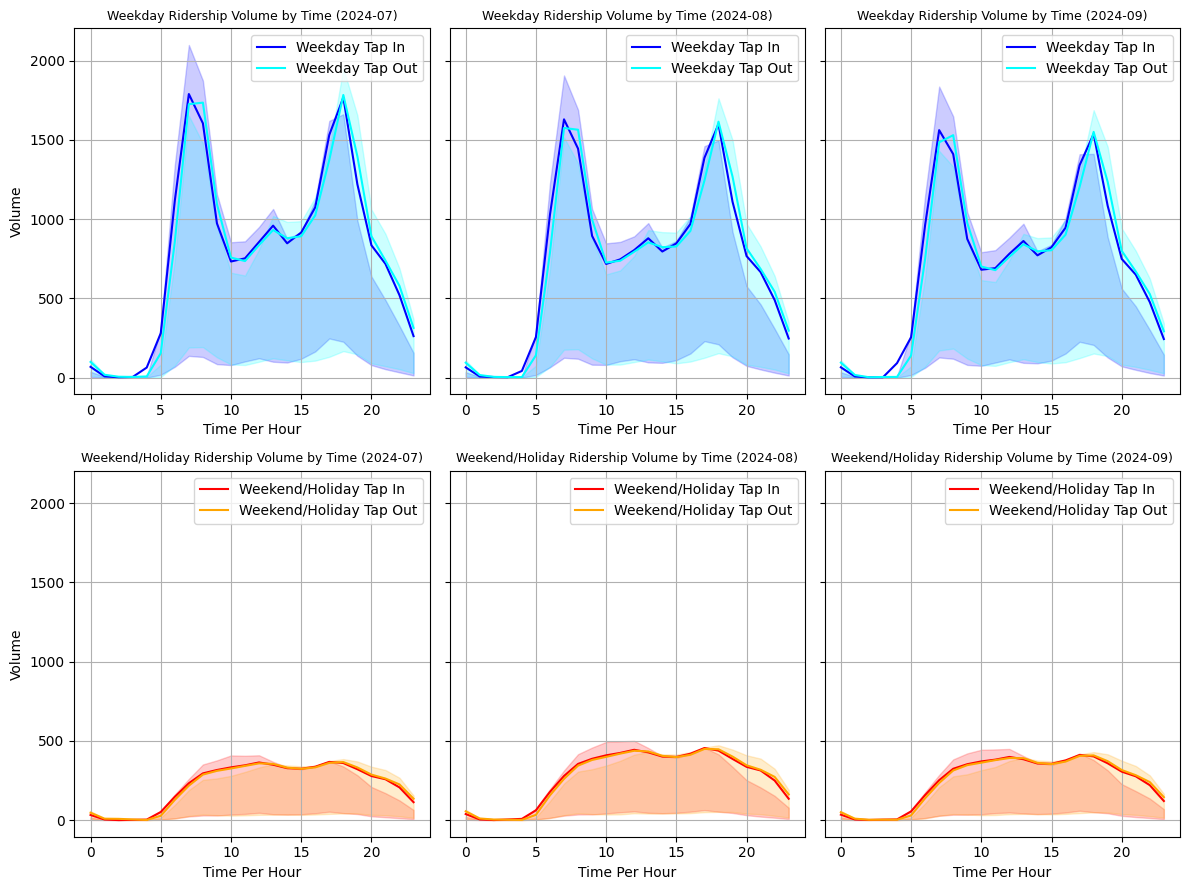

In [17]:
# Filter data for weekdays and weekends/holidays
weekdays = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKDAY']
weekends = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Get unique months
unique_months = average_ridership_by_stop['YEAR_MONTH'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(unique_months), figsize=(12, 9), sharey=True)

for i, month in enumerate(unique_months):
    # Filter data for the current month
    weekdays_month = weekdays[weekdays['YEAR_MONTH'] == month]
    weekends_month = weekends[weekends['YEAR_MONTH'] == month]
    
    # Plot for weekdays with shaded area
    axes[0, i].plot(weekdays_month['TIME_PER_HOUR'], weekdays_month['TAP_IN_MEAN'], label='Weekday Tap In', color='blue')
    axes[0, i].fill_between(weekdays_month['TIME_PER_HOUR'],
                            weekdays_month['TAP_IN_25'],
                            weekdays_month['TAP_IN_75'],
                            color='blue', alpha=0.2)
    axes[0, i].plot(weekdays_month['TIME_PER_HOUR'], weekdays_month['TAP_OUT_MEAN'], label='Weekday Tap Out', color='cyan')
    axes[0, i].fill_between(weekdays_month['TIME_PER_HOUR'],
                            weekdays_month['TAP_OUT_25'],
                            weekdays_month['TAP_OUT_75'],
                            color='cyan', alpha=0.2)
    
    # Add labels and title for weekdays plot
    axes[0, i].set_xlabel('Time Per Hour')
    if i == 0:
        axes[0, i].set_ylabel('Volume')
    axes[0, i].set_title(f'Weekday Ridership Volume by Time ({month})', fontsize=9)
    axes[0, i].legend()
    axes[0, i].grid(True)
    
    # Plot for weekends/holidays with shaded area
    axes[1, i].plot(weekends_month['TIME_PER_HOUR'], weekends_month['TAP_IN_MEAN'], label='Weekend/Holiday Tap In', color='red')
    axes[1, i].fill_between(weekends_month['TIME_PER_HOUR'],
                            weekends_month['TAP_IN_25'],
                            weekends_month['TAP_IN_75'],
                            color='red', alpha=0.2)
    axes[1, i].plot(weekends_month['TIME_PER_HOUR'], weekends_month['TAP_OUT_MEAN'], label='Weekend/Holiday Tap Out', color='orange')
    axes[1, i].fill_between(weekends_month['TIME_PER_HOUR'],
                            weekends_month['TAP_OUT_25'],
                            weekends_month['TAP_OUT_75'],
                            color='orange', alpha=0.2)
    
    # Add labels and title for weekends/holidays plot
    axes[1, i].set_xlabel('Time Per Hour')
    if i == 0:
        axes[1, i].set_ylabel('Volume')
    axes[1, i].set_title(f'Weekend/Holiday Ridership Volume by Time ({month})', fontsize=9)
    axes[1, i].legend()
    axes[1, i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Function to pivot the DataFrame
def pivot_ridership(df, metric):
    pivoted_df = df.pivot(index=['TIME_PER_HOUR', 'DAY_TYPE'], columns='YEAR_MONTH', values=[f'TAP_IN_{metric}', f'TAP_OUT_{metric}'])
    pivoted_df.columns = [f'{col[1]}_{col[0]}' for col in pivoted_df.columns]
    return pivoted_df.reset_index()


# Filter the DataFrame for each DAY_TYPE
weekday_df = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKDAY']
weekend_df = average_ridership_by_stop[average_ridership_by_stop['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Create tables for MEAN, 25th percentile, and 75th percentile for weekdays
weekday_mean_table = pivot_ridership(weekday_df, 'MEAN')
weekday_percentile_25_table = pivot_ridership(weekday_df, '25')
weekday_percentile_75_table = pivot_ridership(weekday_df, '75')

# Create tables for MEAN, 25th percentile, and 75th percentile for weekends/holidays
weekend_mean_table = pivot_ridership(weekend_df, 'MEAN')
weekend_percentile_25_table = pivot_ridership(weekend_df, '25')
weekend_percentile_75_table = pivot_ridership(weekend_df, '75')

weekday_mean_table

,TIME_PER_HOUR,DAY_TYPE,2024-07_TAP_IN_MEAN,2024-08_TAP_IN_MEAN,2024-09_TAP_IN_MEAN,2024-07_TAP_OUT_MEAN,2024-08_TAP_OUT_MEAN,2024-09_TAP_OUT_MEAN
0,0.0,WEEKDAY,67.845101,64.436203,64.845067,98.928194,94.064155,94.574234
1,1.0,WEEKDAY,7.769004,6.757167,7.057034,17.827342,15.998876,16.459533
2,2.0,WEEKDAY,2.380952,3.581395,1.422222,5.428571,4.465116,2.200000
3,3.0,WEEKDAY,3.866667,2.812500,2.263158,4.066667,3.250000,3.894737
4,4.0,WEEKDAY,63.263158,42.076923,91.360000,7.315789,3.057692,4.240000
5,5.0,WEEKDAY,280.171532,255.602539,254.516575,154.149013,140.614132,139.008287
6,6.0,WEEKDAY,1116.542221,1027.809495,962.709145,857.089211,788.269766,748.916302
7,7.0,WEEKDAY,1789.318889,1629.660114,1561.540822,1725.253890,1575.013564,1484.877828
8,8.0,WEEKDAY,1604.637833,1444.761502,1410.144993,1735.076256,1564.133700,1529.693488
9,9.0,WEEKDAY,973.341285,894.211864,874.922789,1094.371845,997.176192,975.758322


# Looking at Total Trips in a Bus Stop Data
Now that we know each bus stops tap in and out, we are interested to look at the total number of trips that run through this bus stops and get a better representation of the ridership. 

In [25]:
# read the bus trips data

bus_trips = pd.read_csv("../data/origin_destination_bus_202408.csv")
bus_trips

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2024-08,WEEKENDS/HOLIDAY,18,BUS,76201,76079,6
1,2024-08,WEEKENDS/HOLIDAY,7,BUS,10351,13201,7
2,2024-08,WEEKENDS/HOLIDAY,19,BUS,76061,75371,1
3,2024-08,WEEKENDS/HOLIDAY,9,BUS,14271,7021,2
4,2024-08,WEEKDAY,5,BUS,54581,66471,1
...,...,...,...,...,...,...,...
5760076,2024-08,WEEKENDS/HOLIDAY,20,BUS,60069,46009,13
5760077,2024-08,WEEKDAY,8,BUS,76141,75311,58
5760078,2024-08,WEEKDAY,10,BUS,11369,28221,1
5760079,2024-08,WEEKDAY,18,BUS,75419,66381,1


In [47]:
# Example: 
bus_trips[(bus_trips['ORIGIN_PT_CODE'] == 22009) & (bus_trips['DESTINATION_PT_CODE'] == 22441)  & (bus_trips['TIME_PER_HOUR'] == 10)  ]
bus_trips[(bus_trips['ORIGIN_PT_CODE'] == 22441) & (bus_trips['DESTINATION_PT_CODE'] == 22591)  & (bus_trips['TIME_PER_HOUR'] == 10)  ]

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
3212114,2024-08,WEEKDAY,10,BUS,22009,22441,347
5201203,2024-08,WEEKENDS/HOLIDAY,10,BUS,22009,22441,197


We are unable to group by origin or destination PT_Code due to the over laps

In [93]:
# TODO: create a df to create origin destination pair 

# Sort by ServiceNo and StopSequence to ensure proper order
bus_routes_grouped = bus_routes.sort_values(by=['ServiceNo', 'Direction', 'StopSequence']).reset_index(drop=True)

# Initialize list to store origin-destination pairs
origin_destination_pairs = []

# Sliding window approach for each ServiceNo
for (service_no, direction), group in bus_routes_grouped.groupby(['ServiceNo', 'Direction']):
    group = group.reset_index(drop=True)
    
    for i in range(len(group) - 1):
        # Set current stop as origin and next stop as destination
        origin_stop = group.iloc[i]
        destination_stop = group.iloc[i + 1]
        
        origin_destination_pairs.append({
            'ServiceNo': service_no,
            'Direction': direction,
            'Origin_Stop': origin_stop['BusStopCode'],
            'Destination_Stop': destination_stop['BusStopCode'],
            'Origin_StopSequence': origin_stop['StopSequence'],
            'Destination_StopSequence': destination_stop['StopSequence']
        })

# Convert the result to DataFrame
bus_routes_od_df = pd.DataFrame(origin_destination_pairs)

bus_routes_od_df

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence
0,10,1,75009,76059,1,2
1,10,1,76059,76069,2,3
2,10,1,76069,96289,3,4
3,10,1,96289,96109,4,5
4,10,1,96109,85079,5,6
...,...,...,...,...,...,...
24773,9B,1,95081,95091,24,25
24774,9B,1,95091,95131,25,26
24775,9B,1,95131,95141,26,27
24776,9B,1,95141,95061,27,28


In [96]:
# Merge the bus_routes_od_df with bus trips
bus_routes_trips = pd.merge(
    bus_routes_od_df,
    bus_trips,
    left_on=['Origin_Stop', 'Destination_Stop'],
    right_on=['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE'],
    how = 'inner'
)


bus_routes_trips = bus_routes_trips[[
    'ServiceNo', 'Direction', 'Origin_Stop', 'Destination_Stop', 'Origin_StopSequence', 'Destination_StopSequence',
    'DAY_TYPE', 'TIME_PER_HOUR', 'PT_TYPE', 'TOTAL_TRIPS'
]]

bus_routes_trips


,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS
0,10,1,75009,76059,1,2,WEEKDAY,9,BUS,196
1,10,1,75009,76059,1,2,WEEKDAY,22,BUS,26
2,10,1,75009,76059,1,2,WEEKENDS/HOLIDAY,20,BUS,41
3,10,1,75009,76059,1,2,WEEKDAY,15,BUS,301
4,10,1,75009,76059,1,2,WEEKDAY,5,BUS,4
...,...,...,...,...,...,...,...,...,...,...
713494,993,1,40329,43453,18,19,WEEKDAY,9,BUS,2
713495,993,1,40329,43453,18,19,WEEKENDS/HOLIDAY,9,BUS,2
713496,993,1,40329,43453,18,19,WEEKDAY,8,BUS,5
713497,993,1,40329,43453,18,19,WEEKDAY,18,BUS,3


# Model potential bus trips per hour.
Given that we have the bus frequency data, we can clean up the file to estimate the potential number of trips per hour in each stop.

In [97]:
bus_frequency = pd.read_json("../data/BusServices.json")
bus_frequency[(bus_frequency['Category'] == 'TRUNK') & (bus_frequency['OriginCode'] == bus_frequency['DestinationCode'])]

,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
4,119,GAS,1,TRUNK,65009,65009,09-13,12-18,12-15,15-17,Hougang St 21
11,15,GAS,1,TRUNK,77009,77009,04-09,04-13,07-15,13-16,Marine Parade Rd
21,34,GAS,1,TRUNK,65009,65009,4-9,4-15,9-13,11-14,PTB2 Basement
28,36,GAS,1,TRUNK,95129,95129,08-08,08-11,07-09,07-12,Tomlinson Rd
41,403,GAS,1,TRUNK,77009,77009,13-13,13-19,14-19,14-25,Pasir Ris Rd
...,...,...,...,...,...,...,...,...,...,...,...
702,965,TTS,1,TRUNK,47009,47009,09-12,09-13,10-13,11-13,Sengkang Sq
705,966,TTS,1,TRUNK,46009,46009,06-07,06-12,07-13,12-13,Marine Parade Rd
716,98,TTS,1,TRUNK,28009,28009,06-10,08-16,08-08,08-20,Jurong Pier Way
723,98M,TTS,1,TRUNK,28009,28009,-,17-18,-,12-17,Corporation Rd


In [98]:
# We want the category of service in bus_frequnecy in bus_route_trips
bus_routes_trips = bus_routes_trips.merge(bus_frequency[['ServiceNo', 'Direction', 'Category']], 
                     on=['ServiceNo', 'Direction'], how='right')

bus_routes_trips

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Category
0,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,8.0,BUS,29.0,TRUNK
1,118,1,96289.0,96109.0,19.0,20.0,WEEKENDS/HOLIDAY,22.0,BUS,1.0,TRUNK
2,118,1,96289.0,96109.0,19.0,20.0,WEEKENDS/HOLIDAY,20.0,BUS,7.0,TRUNK
3,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,11.0,BUS,21.0,TRUNK
4,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,13.0,BUS,16.0,TRUNK
...,...,...,...,...,...,...,...,...,...,...,...
713499,992,2,40309.0,43409.0,12.0,13.0,WEEKDAY,13.0,BUS,4.0,TRUNK
713500,992,2,40309.0,43409.0,12.0,13.0,WEEKDAY,17.0,BUS,4.0,TRUNK
713501,992,2,40309.0,43409.0,12.0,13.0,WEEKENDS/HOLIDAY,10.0,BUS,5.0,TRUNK
713502,992,2,40309.0,43409.0,12.0,13.0,WEEKENDS/HOLIDAY,16.0,BUS,1.0,TRUNK


In [99]:
# Function to calculate average frequency from frequency range
def mean_frequency(freq):
    if freq == '-' or pd.isna(freq):
        return None  # Handle missing or empty frequencies
    # Split frequency range and convert to integers
    range_vals = list(map(int, freq.split('-')))
    return sum(range_vals) / 2  # Calculate the mean

# Apply mean calculation to each frequency column
bus_frequency['AM_Peak_Freq'] = bus_frequency['AM_Peak_Freq'].apply(mean_frequency)
bus_frequency['AM_Offpeak_Freq'] = bus_frequency['AM_Offpeak_Freq'].apply(mean_frequency)
bus_frequency['PM_Peak_Freq'] = bus_frequency['PM_Peak_Freq'].apply(mean_frequency)
bus_frequency['PM_Offpeak_Freq'] = bus_frequency['PM_Offpeak_Freq'].apply(mean_frequency)

bus_frequency = bus_frequency.fillna(0)

bus_frequency.head()

,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
0,118,GAS,1,TRUNK,65009,97009,6.5,10.0,9.0,11.5,
1,118,GAS,2,TRUNK,97009,65009,10.0,9.5,6.0,10.5,
2,118A,GAS,1,TRUNK,65009,96119,36.0,0.0,0.0,0.0,
3,118B,GAS,1,TRUNK,96111,65191,0.0,0.0,40.5,0.0,
4,119,GAS,1,TRUNK,65009,65009,11.0,15.0,13.5,16.0,Hougang St 21


In [100]:
# calculate estimated trips per hour based on the peak frequencies

import math

# Step 1: Define the time ranges for peak periods
def get_frequency_type(time_hour):
    if 7 <= time_hour <= 9:
        return 'AM_Peak_Freq'
    elif 10 <= time_hour <= 16:
        return 'AM_Offpeak_Freq'
    elif 17 <= time_hour <= 19:
        return 'PM_Peak_Freq'
    elif 20 <= time_hour <= 23:
        return 'PM_Offpeak_Freq'
    else:
        return None

# Step 2: Function to calculate trips per hour based on frequency in minutes
def calculate_trips_per_hour(frequency_minutes):
    if frequency_minutes > 0:
        trips_per_hour = 60 / frequency_minutes
        return math.floor(trips_per_hour)
    return 0 


# step 2: Map the frequency to each row
def calculate_estimated_trips(row):
    frequency_df = bus_frequency
    freq_type = get_frequency_type(row['TIME_PER_HOUR'])
    
    if freq_type:
        service_info = frequency_df[(frequency_df['ServiceNo'] == row['ServiceNo']) &
                                    (frequency_df['Direction'] == row['Direction'])]
        
        if not service_info.empty:
            frequency = service_info.iloc[0][freq_type]
            return calculate_trips_per_hour(frequency)
    return 0


In [101]:
# Apply the function to calculate estimated trips per hour
bus_routes_trips['Estimated_Trips'] = bus_routes_trips.apply(calculate_estimated_trips, axis=1)


In [102]:
bus_routes_trips

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Category,Estimated_Trips
0,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,8.0,BUS,29.0,TRUNK,9
1,118,1,96289.0,96109.0,19.0,20.0,WEEKENDS/HOLIDAY,22.0,BUS,1.0,TRUNK,5
2,118,1,96289.0,96109.0,19.0,20.0,WEEKENDS/HOLIDAY,20.0,BUS,7.0,TRUNK,5
3,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,11.0,BUS,21.0,TRUNK,6
4,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,13.0,BUS,16.0,TRUNK,6
...,...,...,...,...,...,...,...,...,...,...,...,...
713499,992,2,40309.0,43409.0,12.0,13.0,WEEKDAY,13.0,BUS,4.0,TRUNK,6
713500,992,2,40309.0,43409.0,12.0,13.0,WEEKDAY,17.0,BUS,4.0,TRUNK,12
713501,992,2,40309.0,43409.0,12.0,13.0,WEEKENDS/HOLIDAY,10.0,BUS,5.0,TRUNK,6
713502,992,2,40309.0,43409.0,12.0,13.0,WEEKENDS/HOLIDAY,16.0,BUS,1.0,TRUNK,6


In [103]:
# Group by ServiceNo and Direction, then find the maximum Destination_StopSequence for each group
max_stop_sequence = bus_routes_trips.groupby(['ServiceNo', 'Direction'])['Destination_StopSequence'].max().reset_index()

# Rename the column for clarity
max_stop_sequence = max_stop_sequence.rename(columns={'Destination_StopSequence': 'Max_StopSequence'})

# Merge the max stop sequence information back into the original dataframe if desired
bus_routes_trips = bus_routes_trips.merge(max_stop_sequence, on=['ServiceNo', 'Direction'], how='left')


bus_routes_trips

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Category,Estimated_Trips,Max_StopSequence
0,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,8.0,BUS,29.0,TRUNK,9,26.0
1,118,1,96289.0,96109.0,19.0,20.0,WEEKENDS/HOLIDAY,22.0,BUS,1.0,TRUNK,5,26.0
2,118,1,96289.0,96109.0,19.0,20.0,WEEKENDS/HOLIDAY,20.0,BUS,7.0,TRUNK,5,26.0
3,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,11.0,BUS,21.0,TRUNK,6,26.0
4,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,13.0,BUS,16.0,TRUNK,6,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
713499,992,2,40309.0,43409.0,12.0,13.0,WEEKDAY,13.0,BUS,4.0,TRUNK,6,15.0
713500,992,2,40309.0,43409.0,12.0,13.0,WEEKDAY,17.0,BUS,4.0,TRUNK,12,15.0
713501,992,2,40309.0,43409.0,12.0,13.0,WEEKENDS/HOLIDAY,10.0,BUS,5.0,TRUNK,6,15.0
713502,992,2,40309.0,43409.0,12.0,13.0,WEEKENDS/HOLIDAY,16.0,BUS,1.0,TRUNK,6,15.0


In [104]:
# Adjust the estimated trips by ensuring estimated trips i s <= total est column
bus_routes_trips['Adj_Estimated_Trips'] = bus_routes_trips[['TOTAL_TRIPS', 'Estimated_Trips']].min(axis=1)

# Drop the 'Estimated_Trips' column
bus_routes_trips = bus_routes_trips.drop(columns=['Estimated_Trips'])

bus_routes_trips

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Category,Max_StopSequence,Adj_Estimated_Trips
0,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,8.0,BUS,29.0,TRUNK,26.0,9.0
1,118,1,96289.0,96109.0,19.0,20.0,WEEKENDS/HOLIDAY,22.0,BUS,1.0,TRUNK,26.0,1.0
2,118,1,96289.0,96109.0,19.0,20.0,WEEKENDS/HOLIDAY,20.0,BUS,7.0,TRUNK,26.0,5.0
3,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,11.0,BUS,21.0,TRUNK,26.0,6.0
4,118,1,96289.0,96109.0,19.0,20.0,WEEKDAY,13.0,BUS,16.0,TRUNK,26.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
713499,992,2,40309.0,43409.0,12.0,13.0,WEEKDAY,13.0,BUS,4.0,TRUNK,15.0,4.0
713500,992,2,40309.0,43409.0,12.0,13.0,WEEKDAY,17.0,BUS,4.0,TRUNK,15.0,4.0
713501,992,2,40309.0,43409.0,12.0,13.0,WEEKENDS/HOLIDAY,10.0,BUS,5.0,TRUNK,15.0,5.0
713502,992,2,40309.0,43409.0,12.0,13.0,WEEKENDS/HOLIDAY,16.0,BUS,1.0,TRUNK,15.0,1.0


In [105]:
# save this dataframe 
bus_routes_trips.to_csv('../data/cleaned/bus_route_trips.csv', index=False)

# Try analysis on a particular route
Given a choosen route, lets see how we can model the ridership 

### Picking a bus route to analyse if ridership is lower for some of its BusStopCodes
TODO: right now just checking if for any bus stop code, the ridership is lower than 25th percentile, whether or not it is Weekend/Weekday, and disregarding time of day  
Might want to average across tapin/tapout, time of day and weekday/weekend


In [106]:
CHOSEN_BUS = '193'
chosen_route = bus_routes[bus_routes['ServiceNo'] == CHOSEN_BUS]
chosen_route.head()

,ServiceNo,Operator,Direction,StopSequence,BusStopCode,Distance,WD_FirstBus,WD_LastBus,SAT_FirstBus,SAT_LastBus,SUN_FirstBus,SUN_LastBus
8595,193,SMRT,1,1,22009,0.0,0545,2330,0545,2330,0545,2330
8596,193,SMRT,1,2,22441,0.8,0548,2333,0548,2334,0548,2334
8597,193,SMRT,1,3,22591,1.1,0549,2334,0549,2335,0549,2335
8598,193,SMRT,1,4,22341,1.4,0550,2335,0550,2336,0550,2336
8599,193,SMRT,1,5,22351,1.8,0552,2337,0552,2338,0552,2338


In [107]:
chosen_trip = bus_routes_trips[bus_routes_trips['ServiceNo'] == CHOSEN_BUS]
chosen_trip.head()

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Category,Max_StopSequence,Adj_Estimated_Trips
526896,193,1,22009.0,22441.0,1.0,2.0,WEEKDAY,22.0,BUS,857.0,TRUNK,43.0,2.0
526897,193,1,22009.0,22441.0,1.0,2.0,WEEKENDS/HOLIDAY,9.0,BUS,120.0,TRUNK,43.0,4.0
526898,193,1,22009.0,22441.0,1.0,2.0,WEEKDAY,8.0,BUS,325.0,TRUNK,43.0,4.0
526899,193,1,22009.0,22441.0,1.0,2.0,WEEKENDS/HOLIDAY,22.0,BUS,384.0,TRUNK,43.0,2.0
526900,193,1,22009.0,22441.0,1.0,2.0,WEEKENDS/HOLIDAY,11.0,BUS,310.0,TRUNK,43.0,4.0


In [114]:
bus_ridership_quarter = bus_ridership_quarter.rename(columns={
    'PT_CODE':'Destination_Stop'
})


merged_chosen_route = chosen_trip.merge(
    bus_ridership_quarter, 
    on=['Destination_Stop', 'PT_TYPE', 'TIME_PER_HOUR', 'DAY_TYPE']
)

merged_chosen_route.head()

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Category,Max_StopSequence,Adj_Estimated_Trips,YEAR_MONTH,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,193,1,22009.0,22441.0,1.0,2.0,WEEKDAY,22.0,BUS,857.0,TRUNK,43.0,2.0,2024-07,151,1068
1,193,1,22009.0,22441.0,1.0,2.0,WEEKDAY,22.0,BUS,857.0,TRUNK,43.0,2.0,2024-08,167,996
2,193,1,22009.0,22441.0,1.0,2.0,WEEKDAY,22.0,BUS,857.0,TRUNK,43.0,2.0,2024-09,102,1006
3,193,1,22009.0,22441.0,1.0,2.0,WEEKENDS/HOLIDAY,9.0,BUS,120.0,TRUNK,43.0,4.0,2024-07,159,229
4,193,1,22009.0,22441.0,1.0,2.0,WEEKENDS/HOLIDAY,9.0,BUS,120.0,TRUNK,43.0,4.0,2024-08,191,244


In [119]:
# Estimate Tap in and out based on trips
merged_chosen_route['Estimated_Tap_In'] = (merged_chosen_route['Adj_Estimated_Trips']*(merged_chosen_route['TOTAL_TAP_IN_VOLUME']/ merged_chosen_route['TOTAL_TRIPS']))

merged_chosen_route['Estimated_Tap_OUT'] = (merged_chosen_route['Adj_Estimated_Trips']*(merged_chosen_route['TOTAL_TAP_OUT_VOLUME']/ merged_chosen_route['TOTAL_TRIPS']))

merged_chosen_route_ridership = merged_chosen_route

In [115]:
ridership_chosen_route = merged_chosen_route.groupby(['YEAR_MONTH','Destination_Stop', 'TIME_PER_HOUR', 'DAY_TYPE']).agg({
    'TOTAL_TAP_IN_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
    'TOTAL_TAP_OUT_VOLUME': ['mean', lambda x: np.percentile(x, 25), lambda x: np.percentile(x, 75)],
}).reset_index()


ridership_chosen_route.columns = ['YEAR_MONTH', 'Destination_Stop', 'TIME_PER_HOUR', 'DAY_TYPE', 'TAP_IN_MEAN', 'TAP_IN_25', 'TAP_IN_75', 'TAP_OUT_MEAN', 'TAP_OUT_25', 'TAP_OUT_75']
ridership_chosen_route

,YEAR_MONTH,Destination_Stop,TIME_PER_HOUR,DAY_TYPE,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
0,2024-07,22009.0,0.0,WEEKDAY,7332.0,7332.0,7332.0,1671.0,1671.0,1671.0
1,2024-07,22009.0,0.0,WEEKENDS/HOLIDAY,3827.0,3827.0,3827.0,727.0,727.0,727.0
2,2024-07,22009.0,5.0,WEEKDAY,12291.0,12291.0,12291.0,24027.0,24027.0,24027.0
3,2024-07,22009.0,5.0,WEEKENDS/HOLIDAY,1612.0,1612.0,1612.0,3214.0,3214.0,3214.0
4,2024-07,22009.0,6.0,WEEKDAY,74725.0,74725.0,74725.0,95943.0,95943.0,95943.0
...,...,...,...,...,...,...,...,...,...,...
2240,2024-09,26209.0,11.0,WEEKDAY,46.0,46.0,46.0,11.0,11.0,11.0
2241,2024-09,26209.0,12.0,WEEKDAY,12.0,12.0,12.0,36.0,36.0,36.0
2242,2024-09,26209.0,18.0,WEEKDAY,79.0,79.0,79.0,18.0,18.0,18.0
2243,2024-09,26209.0,19.0,WEEKENDS/HOLIDAY,24.0,24.0,24.0,15.0,15.0,15.0


In [123]:
# Merge ridership_chosen_route with average_ridership_by_stop on TIME_PER_HOUR and DAY_TYPE
merged_ridership = merged_chosen_route_ridership.merge(average_ridership_by_stop, on=['YEAR_MONTH', 'TIME_PER_HOUR', 'DAY_TYPE'])

# Filter BusStopCodes where TOTAL_TAP_IN_VOLUME mean in ridership_chosen_route is smaller than in average_ridership_by_stop
filtered_busstops = merged_ridership[
    (merged_ridership['Estimated_Tap_In'] < merged_ridership['TAP_IN_25']) &
    (merged_ridership['Estimated_Tap_OUT'] < merged_ridership['TAP_OUT_25']) &
    (merged_ridership['TIME_PER_HOUR'] > 5) & (merged_ridership['TIME_PER_HOUR'] < 20) 
    ]
#filtered_busstops['BusStopCode'].unique()
filtered_busstops


,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,...,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,Estimated_Tap_In,Estimated_Tap_OUT,TAP_IN_MEAN,TAP_IN_25,TAP_IN_75,TAP_OUT_MEAN,TAP_OUT_25,TAP_OUT_75
39,193,1,22009.0,22441.0,1.0,2.0,WEEKENDS/HOLIDAY,9.0,BUS,120.0,...,159,229,5.3,7.633333,316.126817,29.0,377.0,310.726259,31.0,263.0
41,193,1,22469.0,22189.0,8.0,9.0,WEEKENDS/HOLIDAY,9.0,BUS,74.0,...,74,339,4.0,18.324324,316.126817,29.0,377.0,310.726259,31.0,263.0
47,193,1,22169.0,23501.0,11.0,12.0,WEEKENDS/HOLIDAY,9.0,BUS,1.0,...,5,18,5.0,18.000000,316.126817,29.0,377.0,310.726259,31.0,263.0
50,193,2,25421.0,25431.0,2.0,3.0,WEEKENDS/HOLIDAY,9.0,BUS,1.0,...,6,2,6.0,2.000000,316.126817,29.0,377.0,310.726259,31.0,263.0
52,193,2,25339.0,25329.0,18.0,19.0,WEEKENDS/HOLIDAY,9.0,BUS,1.0,...,7,0,7.0,0.000000,316.126817,29.0,377.0,310.726259,31.0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,193,1,24021.0,24511.0,22.0,23.0,WEEKENDS/HOLIDAY,16.0,BUS,50.0,...,5,64,0.4,5.120000,376.621493,48.0,376.0,369.235025,39.0,382.0
2234,193,1,25429.0,25009.0,42.0,43.0,WEEKENDS/HOLIDAY,16.0,BUS,2.0,...,24,16,24.0,16.000000,376.621493,48.0,376.0,369.235025,39.0,382.0
2236,193,1,23141.0,23489.0,18.0,19.0,WEEKENDS/HOLIDAY,16.0,BUS,1.0,...,5,31,5.0,31.000000,376.621493,48.0,376.0,369.235025,39.0,382.0
2242,193,2,25511.0,25079.0,10.0,11.0,WEEKENDS/HOLIDAY,16.0,BUS,1.0,...,4,0,4.0,0.000000,376.621493,48.0,376.0,369.235025,39.0,382.0


In [124]:
merged_chosen_route[(merged_chosen_route['Direction'] == 1) & (merged_chosen_route['TIME_PER_HOUR'] == 10) & (merged_chosen_route['DAY_TYPE'] == 'WEEKDAY')]

,ServiceNo,Direction,Origin_Stop,Destination_Stop,Origin_StopSequence,Destination_StopSequence,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,TOTAL_TRIPS,Category,Max_StopSequence,Adj_Estimated_Trips,YEAR_MONTH,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,Estimated_Tap_In,Estimated_Tap_OUT
54,193,1,22009.0,22441.0,1.0,2.0,WEEKDAY,10.0,BUS,347.0,TRUNK,43.0,4.0,2024-07,289,504,3.331412,5.809798
55,193,1,22009.0,22441.0,1.0,2.0,WEEKDAY,10.0,BUS,347.0,TRUNK,43.0,4.0,2024-08,290,526,3.342939,6.063401
56,193,1,22009.0,22441.0,1.0,2.0,WEEKDAY,10.0,BUS,347.0,TRUNK,43.0,4.0,2024-09,298,412,3.435159,4.749280
138,193,1,22441.0,22591.0,2.0,3.0,WEEKDAY,10.0,BUS,6.0,TRUNK,43.0,4.0,2024-07,256,364,170.666667,242.666667
139,193,1,22441.0,22591.0,2.0,3.0,WEEKDAY,10.0,BUS,6.0,TRUNK,43.0,4.0,2024-08,246,402,164.000000,268.000000
140,193,1,22441.0,22591.0,2.0,3.0,WEEKDAY,10.0,BUS,6.0,TRUNK,43.0,4.0,2024-09,185,320,123.333333,213.333333
228,193,1,26209.0,25469.0,37.0,38.0,WEEKDAY,10.0,BUS,1.0,TRUNK,43.0,1.0,2024-07,12,12,12.000000,12.000000
229,193,1,26209.0,25469.0,37.0,38.0,WEEKDAY,10.0,BUS,1.0,TRUNK,43.0,1.0,2024-08,20,12,20.000000,12.000000
230,193,1,26209.0,25469.0,37.0,38.0,WEEKDAY,10.0,BUS,1.0,TRUNK,43.0,1.0,2024-09,19,13,19.000000,13.000000
306,193,1,22459.0,22469.0,7.0,8.0,WEEKDAY,10.0,BUS,2.0,TRUNK,43.0,2.0,2024-07,510,284,510.000000,284.000000


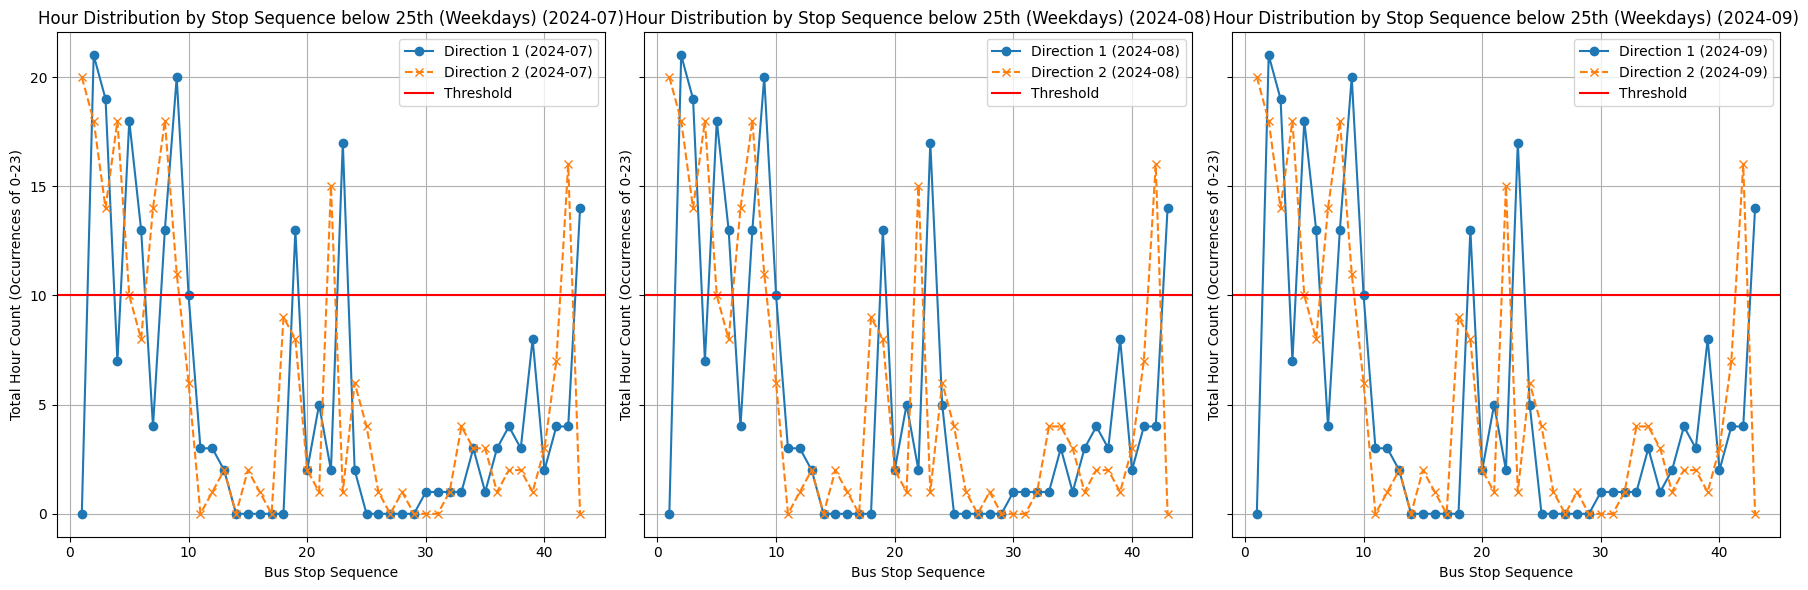

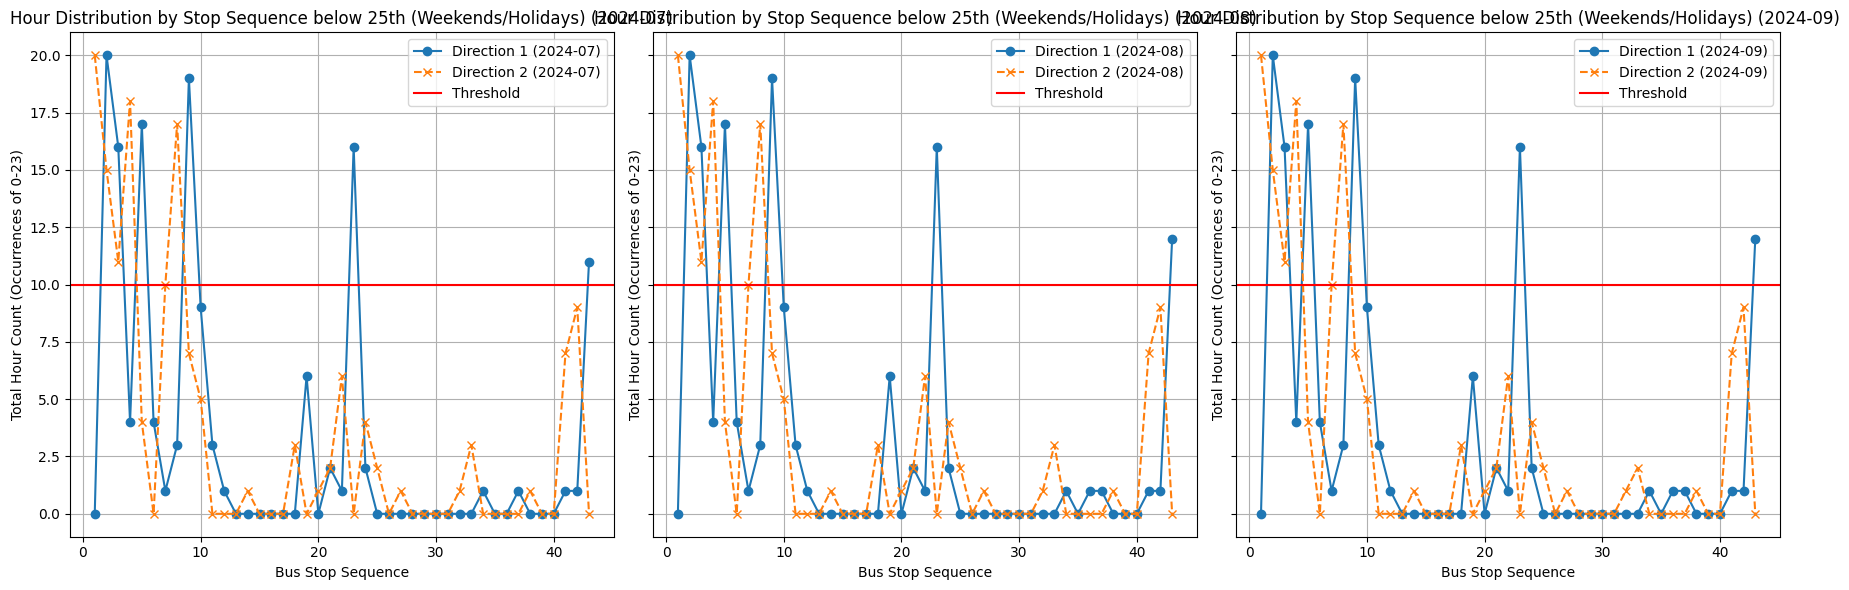

Percentage of stop sequences exceeding 10 in Direction 1: 20.93%
Percentage of stop sequences exceeding 10 in Direction 2: 20.93%


In [129]:
# Step 1: Count occurrences of each TIME_PER_HOUR per StopSequence, DAY_TYPE, Direction, and YEAR_MONTH
hour_counts = (
    merged_chosen_route.groupby(['Destination_StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH'])
    .size()
    .reset_index(name='Total_Hour_Count')
)

# Step 2: Generate all StopSequence, DAY_TYPE, Direction, and YEAR_MONTH combinations for filling missing values
max_sequence = merged_chosen_route['Max_StopSequence'].max()
directions = merged_chosen_route['Direction'].unique()
day_types = merged_chosen_route['DAY_TYPE'].unique()
year_months = merged_chosen_route['YEAR_MONTH'].unique()
full_index = pd.MultiIndex.from_product(
    [range(1, int(max_sequence) + 1), day_types, directions, year_months], 
    names=['Destination_StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH']
)

# Step 3: Reindex hour_counts to include all combinations, filling missing values with 0
hour_counts = hour_counts.set_index(['Destination_StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH']).reindex(full_index, fill_value=0).reset_index()

# Step 4: Separate data by day type
weekday_data = hour_counts[hour_counts['DAY_TYPE'] == 'WEEKDAY']
weekend_data = hour_counts[hour_counts['DAY_TYPE'] == 'WEEKENDS/HOLIDAY']

# Step 5: Reverse StopSequence for Direction 2 to show it as the opposite direction
weekday_data_dir1 = weekday_data[weekday_data['Direction'] == 1]
weekday_data_dir2 = weekday_data[weekday_data['Direction'] == 2].sort_values(by=["YEAR_MONTH", "Destination_StopSequence"], ascending=[True, False])
weekday_data_dir2['Reverse_Num'] = weekday_data_dir2.groupby("YEAR_MONTH").cumcount() + 1

weekend_data_dir1 = weekend_data[weekend_data['Direction'] == 1]
weekend_data_dir2 = weekend_data[weekend_data['Direction'] == 2].sort_values(by=["YEAR_MONTH", "Destination_StopSequence"], ascending=[True, False])
weekend_data_dir2['Reverse_Num'] = weekend_data_dir2.groupby("YEAR_MONTH").cumcount() + 1

# Plotting function for both directions on the same graph
def plot_hour_distribution(data_dir1, data_dir2, title):
    fig, axes = plt.subplots(nrows=1, ncols=len(year_months), figsize=(18, 6), sharey=True)
    
    for i, year_month in enumerate(year_months):
        data_dir1_month = data_dir1[data_dir1['YEAR_MONTH'] == year_month]
        data_dir2_month = data_dir2[data_dir2['YEAR_MONTH'] == year_month]
        
        # Plot Direction 1
        axes[i].plot(data_dir1_month['Destination_StopSequence'], data_dir1_month['Total_Hour_Count'], label=f"Direction 1 ({year_month})", marker='o')
        
        # Plot Direction 2 with reversed StopSequence
        axes[i].plot(data_dir2_month['Reverse_Num'], data_dir2_month['Total_Hour_Count'], label=f"Direction 2 ({year_month})", marker='x', linestyle='--')
        
        axes[i].axhline(y=10, color='r', linestyle='-', label='Threshold')
        
        # Adding labels and title
        axes[i].set_xlabel("Bus Stop Sequence")
        axes[i].set_ylabel("Total Hour Count (Occurrences of 0-23)")
        axes[i].set_title(f"{title} ({year_month})")
        axes[i].legend()
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot for weekdays with both directions
plot_hour_distribution(weekday_data_dir1, weekday_data_dir2, "Hour Distribution by Stop Sequence below 25th (Weekdays)")

# Plot for weekends/holidays with both directions
plot_hour_distribution(weekend_data_dir1, weekend_data_dir2, "Hour Distribution by Stop Sequence below 25th (Weekends/Holidays)")

# Define threshold
threshold = 10

# Calculate total sequences and sequences exceeding threshold for each direction
total_sequences_dir1 = weekday_data_dir1.shape[0]
exceeding_sequences_dir1 = weekday_data_dir1[weekday_data_dir1['Total_Hour_Count'] > threshold].shape[0]

total_sequences_dir2 = weekday_data_dir2.shape[0]
exceeding_sequences_dir2 = weekday_data_dir2[weekday_data_dir2['Total_Hour_Count'] > threshold].shape[0]

# Calculate percentages
percentage_exceed_dir1 = (exceeding_sequences_dir1 / total_sequences_dir1) * 100 if total_sequences_dir1 else 0
percentage_exceed_dir2 = (exceeding_sequences_dir2 / total_sequences_dir2) * 100 if total_sequences_dir2 else 0

# Display the results
print(f"Percentage of stop sequences exceeding {threshold} in Direction 1: {percentage_exceed_dir1:.2f}%")
print(f"Percentage of stop sequences exceeding {threshold} in Direction 2: {percentage_exceed_dir2:.2f}%")


In [159]:
def calculate_exceeding_stop_sequences(bus_service, bus_routes, bus_ridership_quarter, avg_ridership_by_stop, threshold=10):
    print(f'Bus Service: {bus_service}')
    # Step 1: Filter the route data for the specified bus service
    bus_service_route = bus_routes[bus_routes['ServiceNo'] == bus_service]
    total_stops_dir1 = bus_service_route[bus_service_route['Direction'] == 1].shape[0]
    total_stops_dir2 = bus_service_route[bus_service_route['Direction'] == 2].shape[0]
    # print(f'Number of stops in direction 1: {total_stops_dir1}')
    # print(f'Number of stops in direction 2: {total_stops_dir2}')
    
    # Step 2a: Rename column for merging
    bus_ridership_quarter = bus_ridership_quarter.rename(columns={'PT_CODE': 'Destination_Stop'})
    
    # Step 2b: Merge with ridership data
    merged_service = chosen_trip.merge(
        bus_ridership_quarter,
        on=['Destination_Stop', 'PT_TYPE', 'TIME_PER_HOUR', 'DAY_TYPE']
    )

    # Step 4: Estimate Tap-In and Tap-Out based on trips
    merged_service['Estimated_Tap_In'] = (merged_service['Adj_Estimated_Trips'] *
                                               (merged_service['TOTAL_TAP_IN_VOLUME'] / merged_service['TOTAL_TRIPS']))
    merged_service['Estimated_Tap_OUT'] = (merged_service['Adj_Estimated_Trips'] *
                                                (merged_service['TOTAL_TAP_OUT_VOLUME'] / merged_service['TOTAL_TRIPS']))

    # Step 5: Merge ridership with average ridership data
    merged_ridership = merged_service.merge(
        avg_ridership_by_stop,
        on=['YEAR_MONTH', 'TIME_PER_HOUR', 'DAY_TYPE']
    )

    print(merged_ridership)

    # Step 6: Filter stops where TAP_IN/TAP_OUT below the 25th percentile of average, within time bounds
    filtered_busstops = merged_ridership[
        (merged_ridership['Estimated_Tap_In'] < merged_ridership['TAP_IN_25']) &
        (merged_ridership['Estimated_Tap_OUT'] < merged_ridership['TAP_OUT_25']) &
        (merged_ridership['TIME_PER_HOUR'] > 5) & (merged_ridership['TIME_PER_HOUR'] < 23)
    ]
    

    # Step 7: Merge with the original bus route data to get StopSequence and Direction
    merged_data = filtered_busstops
    
    # Step 8: Count occurrences of each TIME_PER_HOUR per StopSequence, DAY_TYPE, and Direction
    hour_counts = (
        merged_data.groupby(['Destination_StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH'])
        .size()
        .reset_index(name='Total_Hour_Count')
    )

    print(f'Number of stops (in any direction) found with < 25th percentile ridership: '
          f'{hour_counts.shape[0]}')

    # Step 8: Generate all StopSequence, DAY_TYPE, and Direction combinations and fill missing values with 0
    max_sequence = merged_data['Max_StopSequence'].max()
    if pd.notna(max_sequence):  # Check if max_sequence is not NaN
        max_sequence = int(max_sequence)
        directions = merged_data['Direction'].unique()
        day_types = merged_data['DAY_TYPE'].unique()
        year_months = merged_data['YEAR_MONTH'].unique()
        full_index = pd.MultiIndex.from_product(
            [range(1, max_sequence + 1), day_types, directions, year_months], 
            names=['Destination_StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH']
        )
        hour_counts = hour_counts.set_index(['Destination_StopSequence', 'DAY_TYPE', 'Direction', 'YEAR_MONTH']).reindex(full_index, fill_value=0).reset_index()
        
    else: 
        print('EITHER: \n '
              f'No bus stops found where TAP_IN/TAP_OUT below the 25th percentile of average within time bounds'
              f'OR no data found for bus service {bus_service}')
        return None
    
    # Step 9: Separate by direction
    weekday_data = hour_counts[hour_counts['DAY_TYPE'] == 'WEEKDAY']
    weekday_data_dir1 = weekday_data[weekday_data['Direction'] == 1]
    weekday_data_dir2 = weekday_data[weekday_data['Direction'] == 2] \
        .sort_values(by=["Destination_StopSequence", 'YEAR_MONTH'], ascending=False)
    
    all_months = weekday_data['YEAR_MONTH'].unique()

    result_by_month = {
        "ServiceNo": bus_service,
        "Threshold": threshold,
    }
    
    for month in all_months:
        weekday_dir1_month = weekday_data_dir1[weekday_data_dir1['YEAR_MONTH'] == month]
        weekday_dir2_month = weekday_data_dir2[weekday_data_dir2['YEAR_MONTH'] == month]

        # Step 10: Calculate the total and exceeding sequences
        total_sequences_dir1 = weekday_dir1_month.shape[0]
        exceeding_sequences_dir1 = weekday_dir1_month[weekday_dir1_month['Total_Hour_Count'] > threshold]["Destination_StopSequence"]
        num_exceeding_sequences_dir1 = exceeding_sequences_dir1.shape[0]
        total_sequences_dir2 = weekday_dir2_month.shape[0]
        exceeding_sequences_dir2 = weekday_dir2_month[weekday_dir2_month['Total_Hour_Count'] > threshold]["Destination_StopSequence"]
        num_exceeding_sequences_dir2 = exceeding_sequences_dir2.shape[0]
        
        # Step 11: Calculate percentages
        percentage_exceed_dir1 = (num_exceeding_sequences_dir1 / total_stops_dir1) * 100 if total_sequences_dir1 else 0
        percentage_exceed_dir2 = (num_exceeding_sequences_dir2 / total_stops_dir2) * 100 if total_sequences_dir2 else 0

        print(total_stops_dir1)
        if total_stops_dir2 == 0:
            percentage_exceed_dir2 = 0
            exceeding_sequences_dir2 = pd.Series()
        result_by_month[month] = {
            "Direction_1": {
                "%_Exceed": round(percentage_exceed_dir1, 2),
                "StopSeqs": exceeding_sequences_dir1.to_list(),
            },
            "Direction_2": {
                "%_Exceed": round(percentage_exceed_dir2, 2),
                "StopSeqs": exceeding_sequences_dir2.to_list(),
            }
        }

    # Return the results
    return result_by_month


In [160]:
results = calculate_exceeding_stop_sequences(
    bus_service='67', 
    bus_routes=bus_routes_trips, 
    bus_ridership_quarter=bus_ridership_quarter, 
    avg_ridership_by_stop=average_ridership_by_stop,
    threshold=10
)
print("Results:\n", results)

Bus Service: 67
     ServiceNo  Direction  Origin_Stop  Destination_Stop  Origin_StopSequence  \
0          193          1      22009.0           22441.0                  1.0   
1          193          1      22441.0           22591.0                  2.0   
2          193          1      22469.0           22189.0                  8.0   
3          193          1      24021.0           24511.0                 22.0   
4          193          1      22341.0           22351.0                  4.0   
...        ...        ...          ...               ...                  ...   
2240       193          2      22461.0           22451.0                 36.0   
2241       193          2      25009.0           25421.0                  1.0   
2242       193          2      25511.0           25079.0                 10.0   
2243       193          2      25329.0           24529.0                 19.0   
2244       193          2      22359.0           22349.0                 39.0   

      Desti

In [166]:
# List of unique bus services
unique_services = bus_routes['ServiceNo'].unique()
print(len(unique_services))


556


In [207]:
# Define the multi-level column structure based on the data format
columns = pd.MultiIndex.from_tuples([
    ('ServiceNo', '', ''),
    ('Threshold', '', ''),
    ('2024-07', 'Direction_1', '%_Exceed'),
    ('2024-07', 'Direction_1', 'StopSeqs'),
    ('2024-07', 'Direction_2', '%_Exceed'),
    ('2024-07', 'Direction_2', 'StopSeqs'),
    ('2024-08', 'Direction_1', '%_Exceed'),
    ('2024-08', 'Direction_1', 'StopSeqs'),
    ('2024-08', 'Direction_2', '%_Exceed'),
    ('2024-08', 'Direction_2', 'StopSeqs'),
    ('2024-09', 'Direction_1', '%_Exceed'),
    ('2024-09', 'Direction_1', 'StopSeqs'),
    ('2024-09', 'Direction_2', '%_Exceed'),
    ('2024-09', 'Direction_2', 'StopSeqs'),
], names=['Month', 'Direction', 'Detail'])

In [208]:
def append_data(df, data_dict):
    # Extract values from the dictionary
    row = {
        ('ServiceNo', '', ''): data_dict['ServiceNo'],
        ('Threshold', '', ''): data_dict['Threshold']
    }
    
    # Loop through each month and direction in the dictionary
    for month, directions in data_dict.items():
        if month in ['ServiceNo', 'Threshold']:
            continue  # Skip non-month entries

        for direction, details in directions.items():
            row[(month, direction, '%_Exceed')] = details['%_Exceed']
            row[(month, direction, 'StopSeqs')] = details['StopSeqs']
    new_row_df = pd.DataFrame([row])
    # Append the row to the DataFrame
    df = pd.concat([df, new_row_df], ignore_index=True)
    return df


In [212]:
# Create the empty DataFrame
df = pd.DataFrame(columns=columns)

# Loop over each bus service and calculate exceeding stop sequences
for service in unique_services:
    print(f"Calculating exceeding stop sequences for Bus Service: {service}")
    results = calculate_exceeding_stop_sequences(
        bus_service=service, 
        bus_routes=bus_routes, 
        bus_ridership=bus_ridership_quarter, 
        avg_ridership_by_stop=average_ridership_by_stop,
        threshold=10
    )
    if results is None:
        continue
    print(results)
    # Append each result to the list
    df = append_data(df, results)

# Convert list of results to DataFrame
df

Calculating exceeding stop sequences for Bus Service: 10
Bus Service: 10
Number of stops in direction 1: 74
Number of stops in direction 2: 74
Number of stops (in any direction) found with < 25th percentile ridership: 80
{'ServiceNo': '10', 'Threshold': 10, '2024-07': {'Direction_1': {'%_Exceed': 1.35, 'StopSeqs': [51]}, 'Direction_2': {'%_Exceed': 1.35, 'StopSeqs': [26]}}, '2024-08': {'Direction_1': {'%_Exceed': 1.35, 'StopSeqs': [51]}, 'Direction_2': {'%_Exceed': 1.35, 'StopSeqs': [26]}}, '2024-09': {'Direction_1': {'%_Exceed': 2.7, 'StopSeqs': [50, 51]}, 'Direction_2': {'%_Exceed': 1.35, 'StopSeqs': [26]}}}
Calculating exceeding stop sequences for Bus Service: 100
Bus Service: 100
Number of stops in direction 1: 57
Number of stops in direction 2: 54


/var/folders/n6/zj2qfsg109b_gvbz1x5ltyf80000gq/T/ipykernel_92969/3377759924.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row_df], ignore_index=True)


Number of stops (in any direction) found with < 25th percentile ridership: 81
{'ServiceNo': '100', 'Threshold': 10, '2024-07': {'Direction_1': {'%_Exceed': 3.51, 'StopSeqs': [20, 35]}, 'Direction_2': {'%_Exceed': 1.85, 'StopSeqs': [22]}}, '2024-08': {'Direction_1': {'%_Exceed': 3.51, 'StopSeqs': [20, 35]}, 'Direction_2': {'%_Exceed': 1.85, 'StopSeqs': [22]}}, '2024-09': {'Direction_1': {'%_Exceed': 5.26, 'StopSeqs': [20, 34, 35]}, 'Direction_2': {'%_Exceed': 1.85, 'StopSeqs': [22]}}}
Calculating exceeding stop sequences for Bus Service: 100A
Bus Service: 100A
Number of stops in direction 1: 13
Number of stops in direction 2: 0
Number of stops (in any direction) found with < 25th percentile ridership: 1
{'ServiceNo': '100A', 'Threshold': 10}
Calculating exceeding stop sequences for Bus Service: 101
Bus Service: 101
Number of stops in direction 1: 46
Number of stops in direction 2: 0
Number of stops (in any direction) found with < 25th percentile ridership: 7
{'ServiceNo': '101', 'Thresh

ServiceNo Threshold     2024-07                                    \
                        Direction_1                       Direction_2   
                           %_Exceed              StopSeqs    %_Exceed   
0          10        10        1.35                  [51]        1.35   
1         100        10        3.51              [20, 35]        1.85   
2        100A        10         NaN                   NaN         NaN   
3         101        10        2.17                  [27]        0.00   
4         102        10        0.00                    []        0.00   
..        ...       ...         ...                   ...         ...   
451      991C        10         NaN                   NaN         NaN   
452       992        10        0.00                    []        0.00   
453       993        10        0.00                    []        0.00   
454        9A        10         NaN                   NaN         NaN   
455        9B        10       17.24  [15, 16, 21, 22, 23]        0.00   

                 2024-08                                                 \
             Direction_1                           Direction_2            
    StopSeqs    %_Exceed                  StopSeqs    %_Exceed StopSeqs   
0       [26]        1.35                      [51]        1.35     [26]   
1       [22]        3.51                  [20, 35]        1.85     [22]   
2        NaN         NaN                       NaN         NaN      NaN   
3         []        2.17                      [27]        0.00       []   
4         []        1.67                      [23]        0.00       []   
..       ...         ...                       ...         ...      ...   
451      NaN        0.00                        []        0.00       []   
452       []        7.14                      [11]        6.67      [4]   
453       []        0.00                        []        0.00       []   
454      NaN         NaN                       NaN         NaN      NaN   
455       []       20.69  [15, 16, 21, 22, 23, 24]        0.00       []   

        2024-09                                         
    Direction_1                   Direction_2           
       %_Exceed          StopSeqs    %_Exceed StopSeqs  
0          2.70          [50, 51]        1.35     [26]  
1          5.26      [20, 34, 35]        1.85     [22]  
2           NaN               NaN         NaN      NaN  
3          2.17              [27]        0.00       []  
4          3.33          [23, 29]        0.00       []  
..          ...               ...         ...      ...  
451        0.00                []        0.00       []  
452        7.14              [11]        6.67      [4]  
453        0.00                []        0.00       []  
454         NaN               NaN         NaN      NaN  
455       13.79  [16, 21, 22, 23]        0.00       []  

[456 rows x 14 columns]

In [220]:
predicate = (
    (df[('2024-07', 'Direction_1', '%_Exceed')] > 0) |
    (df[('2024-07', 'Direction_2', '%_Exceed')] > 0)
    # | (df[('2024-08', 'Direction_1', '%_Exceed')] > 0) |
    # (df[('2024-08', 'Direction_2', '%_Exceed')] > 0) |
    # (df[('2024-09', 'Direction_1', '%_Exceed')] > 0) |
    # (df[('2024-09', 'Direction_2', '%_Exceed')] > 0)
)
# Filter out rows where Percentage_Exceeding_Direction_2 is 0
filtered_services = df[predicate]

# Sort by both percentage columns in descending order
sorted_services = filtered_services.sort_values(
    by=[('2024-07', 'Direction_1', '%_Exceed'), ('2024-07', 'Direction_2', '%_Exceed')], 
    ascending=False
)

# Select the top 20 services based on the sorted percentages
sorted_services[:20]



ServiceNo Threshold     2024-07  \
                        Direction_1   
                           %_Exceed   
160       247        10       76.47   
171       257        10       74.36   
169       254        10       68.75   
118      182M        10       66.67   
117       182        10       65.52   
164      249A        10       64.71   
168       253        10       62.50   
163       249        10       57.89   
162      248M        10       57.58   
161       248        10       56.25   
436      975B        10       54.55   
133       193        10       53.49   
437      975C        10       51.06   
100      170X        10       50.00   
434       975        10       48.91   
167       252        10       43.24   
235       400        10       42.86   
53        138        10       40.68   
54       138A        10       40.00   
132       192        10       39.39   

                                                                    \
                                                       Direction_2   
                                              StopSeqs    %_Exceed   
160  [1, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16,...        0.00   
171  [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16, ...        0.00   
169  [2, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, ...        0.00   
118  [2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, ...        0.00   
117  [2, 4, 5, 6, 7, 8, 9, 11, 13, 14, 15, 16, 17, ...        0.00   
164             [3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16]        0.00   
168  [2, 3, 4, 5, 8, 9, 10, 11, 14, 15, 16, 17, 18,...        0.00   
163  [3, 4, 6, 7, 8, 9, 11, 12, 14, 15, 16, 19, 20,...        0.00   
162  [1, 3, 4, 5, 7, 8, 9, 10, 13, 14, 15, 20, 21, ...        0.00   
161  [1, 3, 4, 5, 7, 8, 9, 10, 13, 14, 19, 20, 23, ...        0.00   
436  [8, 9, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24,...        0.00   
133  [12, 13, 14, 15, 16, 18, 20, 21, 24, 25, 26, 2...       60.47   
437  [15, 16, 21, 22, 23, 25, 26, 27, 28, 29, 30, 3...        0.00   
100                                       [2, 3, 4, 8]       25.00   
434  [15, 16, 21, 22, 23, 25, 26, 27, 28, 29, 30, 3...        0.00   
167  [5, 10, 11, 12, 15, 16, 20, 21, 22, 23, 25, 26...        0.00   
235                  [7, 8, 9, 10, 11, 12, 15, 18, 19]        0.00   
53   [14, 15, 16, 19, 20, 21, 22, 23, 25, 26, 27, 2...        0.00   
54    [14, 15, 16, 19, 20, 21, 22, 23, 25, 26, 27, 28]        0.00   
132  [10, 12, 13, 14, 18, 19, 20, 21, 26, 27, 29, 3...       30.30   

                                                           2024-08  \
                                                       Direction_1   
                                              StopSeqs    %_Exceed   
160                                                 []       78.43   
171                                                 []       71.79   
169                                                 []       68.75   
118                                                 []       63.16   
117                                                 []       62.07   
164                                                 []       64.71   
168                                                 []       54.17   
163                                                 []       55.26   
162                                                 []       63.64   
161                                                 []       62.50   
436                                                 []       48.48   
133  [32, 31, 29, 28, 27, 26, 25, 23, 20, 19, 18, 1...       53.49   
437                                                 []       42.55   
100                                             [5, 1]       50.00   
434                                                 []       43.48   
167                                                 []       35.14   
235                                                 []       42.86   
53                                                  []       38.98   
54                       

In [219]:
# export the df
df.to_csv('../data/cleaned/exceeding_stop_sequences.csv', index=False)

In [28]:
df = pd.read_csv('../data/cleaned/exceeding_stop_sequences.csv', header=[0,1,2])

# Rename columns to remove "Unnamed" and clarify the index
# This assumes 'ServiceNo' and 'Threshold' should be top-level headers only
df.columns = pd.MultiIndex.from_tuples([
    ('ServiceNo', '', ''),
    ('Threshold', '', ''),
    ('2024-07', 'Direction_1', '%_Exceed'),
    ('2024-07', 'Direction_1', 'StopSeqs'),
    ('2024-07', 'Direction_2', '%_Exceed'),
    ('2024-07', 'Direction_2', 'StopSeqs'),
    ('2024-08', 'Direction_1', '%_Exceed'),
    ('2024-08', 'Direction_1', 'StopSeqs'),
    ('2024-08', 'Direction_2', '%_Exceed'),
    ('2024-08', 'Direction_2', 'StopSeqs'),
    ('2024-09', 'Direction_1', '%_Exceed'),
    ('2024-09', 'Direction_1', 'StopSeqs'),
    ('2024-09', 'Direction_2', '%_Exceed'),
    ('2024-09', 'Direction_2', 'StopSeqs')
])

# Drop any rows with NaN in 'ServiceNo' if these were added accidentally as data rows
df = df.dropna(subset=[('ServiceNo', '', '')]).reset_index(drop=True)

df[df['ServiceNo'] =='100A']

ServiceNo Threshold     2024-07                                   2024-08  \
                      Direction_1          Direction_2          Direction_1   
                         %_Exceed StopSeqs    %_Exceed StopSeqs    %_Exceed   
2      100A        10         NaN      NaN         NaN      NaN         NaN   

                                    2024-09                                
           Direction_2          Direction_1          Direction_2           
  StopSeqs    %_Exceed StopSeqs    %_Exceed StopSeqs    %_Exceed StopSeqs  
2      NaN         NaN      NaN         NaN      NaN         NaN      NaN

### Using Bus frequency data to get deeper insights
We will try using the indiviual bus frequency to model number of trips per hour to get a better representation of the ridership

In [40]:
bus_frequency = pd.read_json("../data/BusServices.json")
bus_frequency[(bus_frequency['Category'] == 'TRUNK') & (bus_frequency['OriginCode'] == bus_frequency['DestinationCode'])]

,ServiceNo,Operator,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
4,119,GAS,1,TRUNK,65009,65009,09-13,12-18,12-15,15-17,Hougang St 21
11,15,GAS,1,TRUNK,77009,77009,04-09,04-13,07-15,13-16,Marine Parade Rd
21,34,GAS,1,TRUNK,65009,65009,4-9,4-15,9-13,11-14,PTB2 Basement
28,36,GAS,1,TRUNK,95129,95129,08-08,08-11,07-09,07-12,Tomlinson Rd
41,403,GAS,1,TRUNK,77009,77009,13-13,13-19,14-19,14-25,Pasir Ris Rd
...,...,...,...,...,...,...,...,...,...,...,...
702,965,TTS,1,TRUNK,47009,47009,09-12,09-13,10-13,11-13,Sengkang Sq
705,966,TTS,1,TRUNK,46009,46009,06-07,06-12,07-13,12-13,Marine Parade Rd
716,98,TTS,1,TRUNK,28009,28009,06-10,08-16,08-08,08-20,Jurong Pier Way
723,98M,TTS,1,TRUNK,28009,28009,-,17-18,-,12-17,Corporation Rd


In [20]:
# Function to calculate avaerage from frequency range
def mean_frequency(freq):
    if freq == '-' or pd.isna(freq):
        return None  # Handle missing or empty frequencies
    # Split frequency range and convert to integers
    range_vals = list(map(int, freq.split('-')))
    return sum(range_vals) / 2  # Calculate the mean

# Apply median calculation to each frequency column
bus_frequency['AM_Peak_Freq'] = bus_frequency['AM_Peak_Freq'].apply(mean_frequency)
bus_frequency['AM_Offpeak_Freq'] = bus_frequency['AM_Offpeak_Freq'].apply(mean_frequency)
bus_frequency['PM_Peak_Freq'] = bus_frequency['PM_Peak_Freq'].apply(mean_frequency)
bus_frequency['PM_Offpeak_Freq'] = bus_frequency['PM_Offpeak_Freq'].apply(mean_frequency)

bus_frequency = bus_frequency.fillna(0)

# Drop the Operator column
bus_frequency = bus_frequency.drop(columns=['Operator'])
bus_frequency.head()

,ServiceNo,Direction,Category,OriginCode,DestinationCode,AM_Peak_Freq,AM_Offpeak_Freq,PM_Peak_Freq,PM_Offpeak_Freq,LoopDesc
0,118,1,TRUNK,65009,97009,6.5,10.0,9.0,11.5,
1,118,2,TRUNK,97009,65009,10.0,9.5,6.0,10.5,
2,118A,1,TRUNK,65009,96119,36.0,0.0,0.0,0.0,
3,118B,1,TRUNK,96111,65191,0.0,0.0,40.5,0.0,
4,119,1,TRUNK,65009,65009,11.0,15.0,13.5,16.0,Hougang St 21


In [21]:
# read the bus trips data

bus_trips = pd.read_csv("../data/Passengers_Aug2024/origin_destination_bus_202408.csv")
bus_trips

FileNotFoundError: [Errno 2] No such file or directory: '../data/Passengers_Aug2024/origin_destination_bus_202408.csv'